In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/SalesAnalysis.ipynb
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_June_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv
/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/S

In [2]:
import pandas as pd
import glob

path = r'/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
frame.to_csv('all_months.csv')

In [5]:
#Read the all months combine data
all_data = pd.read_csv('/kaggle/input/Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/all_data.csv')
print(all_data.shape)
#Removing nan values in the dataset
all_data = all_data.dropna(how='all')
all_data.isna().count()


(186850, 6)


Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

# Question 1:
# - What was the best month for sales? How much was earned that month?
 

Create a Month column to store only months from Order Date

In [6]:
all_data['Months'] = pd.to_datetime(all_data['Order Date'],  errors='coerce')
#to get particularly the month
all_data['Months'] = all_data.Months.dt.month

In [7]:

#CREATE A CLOUMN CALLED Month
#dont forget to add errors='coerce'
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'],errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'],errors='coerce')
all_data['Revenue'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Revenue
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99


In [24]:
sales = all_data.groupby('Months').sum()
print(sales['Revenue'])

Months
1.00000    1822256.73000
2.00000    2202022.42000
3.00000    2807100.38000
4.00000    3390670.24000
5.00000    3152606.75000
6.00000    2577802.26000
7.00000    2647775.76000
8.00000    2244467.88000
9.00000    2097560.13000
10.00000   3736726.88000
11.00000   3199603.20000
12.00000   4613443.34000
Name: Revenue, dtype: float64


# Question 2 - What city sold the most product?


In [9]:
#CREATE A CITY COLUMN 
all_data['City'] = all_data['Purchase Address'].str.split(',')

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])


                Quantity Ordered    Price Each       Months       Revenue
City                                                                     
 Atlanta             16602.00000 2779908.20000 104794.00000 2795498.58000
 Austin              11153.00000 1809873.61000  69829.00000 1819581.75000
 Boston              22528.00000 3637409.77000 141112.00000 3661642.01000
 Dallas              16730.00000 2752627.82000 104620.00000 2767975.40000
 Los Angeles         33289.00000 5421435.23000 208325.00000 5452570.80000
 New York City       27932.00000 4635370.83000 175741.00000 4664317.43000
 Portland            14053.00000 2307747.47000  87765.00000 2320490.61000
 San Francisco       50239.00000 8211461.74000 315520.00000 8262203.91000
 Seattle             16553.00000 2733296.01000 104941.00000 2747755.48000


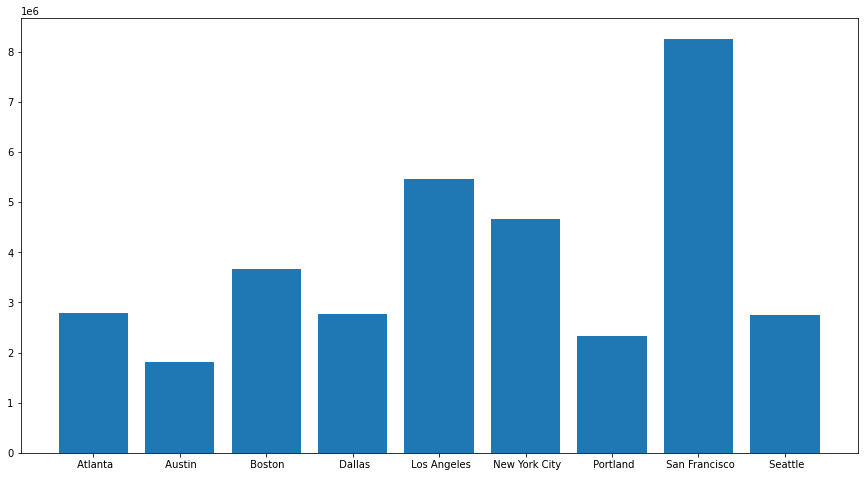

In [11]:

#If you want revenue in highest city but also can extract revenue from it
pd.set_option('display.float_format', lambda x: '%.5f' % x)



revenue = all_data.groupby('City').sum()
print(revenue)
name_cities = [city for city,df in all_data.groupby('City')]
plt.figure(figsize=(15,8))#also can use parameter as rotation=vertical in xticks

plt.bar(name_cities,revenue['Revenue'])
plt.xticks(name_cities)
plt.show()

# The city San Francisco sold the Highest Products

# #Question 3: 
# What product sold the most? Why do you think it sold the most?
#  

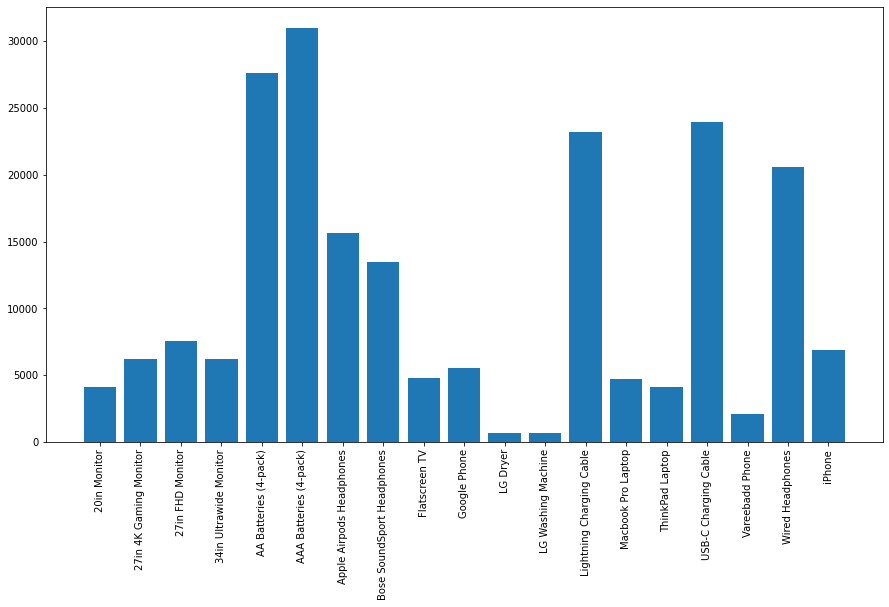

In [12]:
product = [Product for Product,df in all_data.groupby('Product')]
sales_of_product = all_data.groupby('Product')['Quantity Ordered'].sum()

plt.figure(figsize=(15,8))
plt.bar(product,sales_of_product)
plt.xticks(rotation='vertical')
plt.show()



In [13]:
#We plot the mean of the price of product so we conclude that which product is sold due to its price
prices = all_data.groupby('Product').mean()

In [14]:
print(prices)

                            Quantity Ordered  Price Each  Months    Revenue
Product                                                                    
20in Monitor                         1.00683   109.99000 7.15338  110.74097
27in 4K Gaming Monitor               1.00225   389.99000 7.13323  390.86638
27in FHD Monitor                     1.00573   149.99000 7.00120  150.84914
34in Ultrawide Monitor               1.00291   379.99000 7.00599  381.09659
AA Batteries (4-pack)                1.34300     3.84000 7.07382    5.15714
AAA Batteries (4-pack)               1.50269     2.99000 7.09123    4.49304
Apple Airpods Headphones             1.00720   150.00000 7.04077  151.08046
Bose SoundSport Headphones           1.00991    99.99000 7.06289  100.98052
Flatscreen TV                        1.00396   300.00000 7.13000  301.18750
Google Phone                         1.00127   600.00000 6.93303  600.76018
LG Dryer                             1.00000   600.00000 6.78483  600.00000
LG Washing M

<Figure size 1080x576 with 0 Axes>

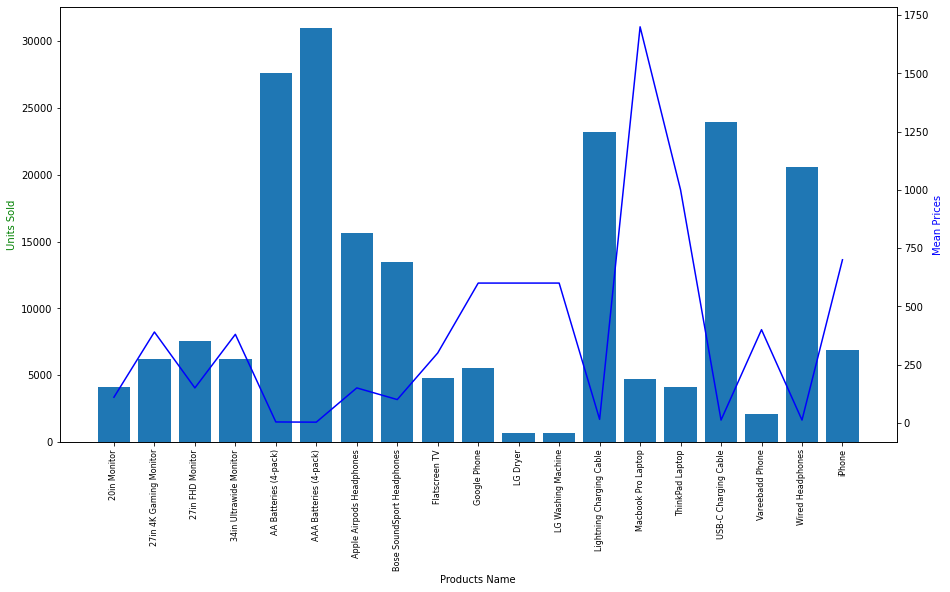

In [15]:
prices = all_data.groupby('Product').mean()['Price Each']
plt.figure(figsize=(15,8))

fig, ax1 = plt.subplots(figsize=(15,8))


ax2 = ax1.twinx()
ax1.bar(product,sales_of_product)
ax2.plot(product,prices, 'b-')

ax1.set_xlabel('Products Name')
ax1.set_ylabel('Units Sold', color='g')
ax2.set_ylabel('Mean Prices', color='b')
ax1.set_xticklabels(product,rotation='vertical',size=8)
plt.show()

# AA batteries are sold the most because they have lowest price

# Question 4:
# What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [16]:
#We create a time(hour) column in all_data
all_data['Hour'] = pd.to_datetime(all_data['Order Date'],  errors='coerce')
all_data['Hour'] = all_data.Hour.dt.hour

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411  

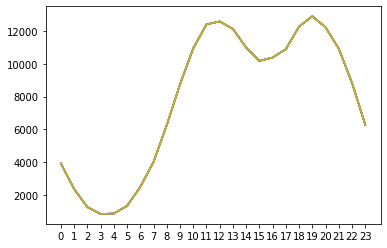

In [17]:
hours = [Hour for Hour,df in all_data.groupby('Hour')]
print(hours)
quantity_ordered = all_data.groupby(['Hour']).count()
print(quantity_ordered)
plt.xticks(hours)
plt.plot(hours,quantity_ordered)


# Advertisements should be displayed during 11 